In [72]:
!pip install kaggle pandas seaborn matplotlib torch numpy kagglehub scikit-learn gensim

In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import datetime as dt

path = kagglehub.dataset_download("sachinkanchan92/reddit-top-posts-50-subreddit-analysis-2011-2024")
print(f'Path to dataset files: {path}')
file_list = [f for f in os.listdir(path) if f.endswith('.csv') and f != '50_subreddits_list.csv']

Path to dataset files: /Users/snehamaurya/.cache/kagglehub/datasets/sachinkanchan92/reddit-top-posts-50-subreddit-analysis-2011-2024/versions/3


In [74]:
# Overview raw data infomation
row_data = pd.DataFrame()
for file in file_list:
  df = pd.read_csv(os.path.join(path, file))
  row_data = pd.concat([row_data, df], ignore_index=True)
row_data

,id,title,score,upvote_ratio,num_comments,created_utc,subreddit,...,num_crossposts,crosspost_subreddits,post_type,is_nsfw,is_bot,is_megathread,body
0,6mwxlt,Please do y...,104836,0.87,2541,2017-07-13 ...,InternetIsB...,...,0,NaN,link,False,False,False,NaN
1,i6fiis,Select a mu...,71026,0.95,1179,2020-08-09 ...,InternetIsB...,...,38,NaN,link,False,False,False,NaN
2,lrf2kv,I spent the...,67305,0.95,3076,2021-02-24 ...,InternetIsB...,...,60,NaN,link,False,False,False,NaN
3,lieih6,I made a we...,48175,0.96,1589,2021-02-12 ...,InternetIsB...,...,17,NaN,link,False,False,False,NaN
4,5dc646,Draw a terr...,44778,0.91,3662,2016-11-17 ...,InternetIsB...,...,6,NaN,link,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49261,14mub68,I am 22 and...,11063,0.90,1607,2023-06-30 ...,IAmA,...,1,NaN,text,False,False,False,"Hi Reddit, ..."
49262,10l0lhh,I'm a dad w...,10820,0.87,701,2023-01-25 ...,IAmA,...,9,NaN,text,False,False,False,In 2015 my ...
49263,1efxcu5,IamA 102 ye...,10012,0.94,1160,2024-07-30 ...,IAmA,...,2,NaN,text,False,False,False,My name is ...
49264,10h5x7n,I’m Brett M...,9082,0.94,572,2023-01-21 ...,IAmA,...,19,NaN,text,False,False,False,PROOF: http...


In [75]:
pd.set_option('display.max_columns', 15)  # Limit the number of displayed columns
pd.set_option('display.max_colwidth', 15)  # Limit column width to 15 characters
display(row_data)

,id,title,score,upvote_ratio,num_comments,created_utc,subreddit,...,num_crossposts,crosspost_subreddits,post_type,is_nsfw,is_bot,is_megathread,body
0,6mwxlt,Please do y...,104836,0.87,2541,2017-07-13 ...,InternetIsB...,...,0,NaN,link,False,False,False,NaN
1,i6fiis,Select a mu...,71026,0.95,1179,2020-08-09 ...,InternetIsB...,...,38,NaN,link,False,False,False,NaN
2,lrf2kv,I spent the...,67305,0.95,3076,2021-02-24 ...,InternetIsB...,...,60,NaN,link,False,False,False,NaN
3,lieih6,I made a we...,48175,0.96,1589,2021-02-12 ...,InternetIsB...,...,17,NaN,link,False,False,False,NaN
4,5dc646,Draw a terr...,44778,0.91,3662,2016-11-17 ...,InternetIsB...,...,6,NaN,link,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49261,14mub68,I am 22 and...,11063,0.90,1607,2023-06-30 ...,IAmA,...,1,NaN,text,False,False,False,"Hi Reddit, ..."
49262,10l0lhh,I'm a dad w...,10820,0.87,701,2023-01-25 ...,IAmA,...,9,NaN,text,False,False,False,In 2015 my ...
49263,1efxcu5,IamA 102 ye...,10012,0.94,1160,2024-07-30 ...,IAmA,...,2,NaN,text,False,False,False,My name is ...
49264,10h5x7n,I’m Brett M...,9082,0.94,572,2023-01-21 ...,IAmA,...,19,NaN,text,False,False,False,PROOF: http...


In [76]:
info_df = pd.DataFrame({
    "Non-Null Count": row_data.notnull().sum(),
    "Dtype": row_data.dtypes
})
info_df.reset_index(inplace=True)
info_df.rename(columns={'index': 'Column'}, inplace=True)
display(info_df)

,Column,Non-Null Count,Dtype
0,id,49266,object
1,title,49266,object
2,score,49266,int64
3,upvote_ratio,49266,float64
4,num_comments,49266,int64
5,created_utc,49266,object
6,subreddit,49266,object
7,subscribers,49266,int64
8,permalink,49266,object
9,url,49266,object


In [77]:
unique_subreddits = row_data['subreddit'].unique()
unique_subreddits

array(['InternetIsBeautiful', 'explainlikeimfive', 'Art', 'EarthPorn',
       'listentothis', 'UpliftingNews', 'Showerthoughts',
       'relationship_advice', 'anime', 'wholesomememes', 'WritingPrompts',
       'OldSchoolCool', 'worldnews', 'Documentaries', 'funny', 'pics',
       'gifs', 'DIY', 'food', 'dataisbeautiful', 'history', 'Jokes',
       'technology', 'videos', 'AskReddit', 'interestingasfuck',
       'personalfinance', 'LifeProTips', 'Music', 'television', 'gaming',
       'nottheonion', 'books', 'Futurology', 'sports', 'tifu', 'memes',
       'aww', 'todayilearned', 'science', 'creepy', 'GetMotivated',
       'news', 'movies', 'mildlyinteresting', 'NoStupidQuestions',
       'askscience', 'travel', 'space', 'IAmA'], dtype=object)

In [78]:
subreddit_stats_list = []
all_data = pd.DataFrame()
for file in file_list:
  df = pd.read_csv(os.path.join(path, file))
  # drop null column
  df.drop(columns = ['crosspost_subreddits', 'body', 'id', 'permalink', 'url', 'domain'], inplace = True)
  # Convert created_utc to datetime
  if 'created_utc' in df.columns:
        df['created_utc'] = pd.to_datetime(df['created_utc'], errors='coerce')  # Convert to datetime, handling errors
  else:
      print("Column 'created_utc' not found in this dataset.")

  # Encode dummy variables
  df['is_nsfw'] = df['is_nsfw'].replace(True, 1)
  df['is_nsfw'] = df['is_nsfw'].replace(False, 0)
  df['is_bot'] = df['is_bot'].replace(True, 1)
  df['is_bot'] = df['is_bot'].replace(False, 0)
  df['is_megathread'] = df['is_megathread'].replace(True, 1)
  df['is_megathread'] = df['is_megathread'].replace(False, 0)

  # Fill null value by mode
  pd.set_option('future.no_silent_downcasting', True)
  df['is_nsfw'] = df['is_nsfw'].fillna(df['is_nsfw'].mode()[0])
  df['is_bot'] = df['is_bot'].fillna(df['is_bot'].mode()[0])
  df['is_megathread'] = df['is_megathread'].fillna(df['is_megathread'].mode()[0])

  df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)
  df.drop_duplicates(inplace = True)


  # Calculate averages for the subreddit
  avg_score = df['score'].mean() if 'score' in df.columns else 0
  avg_upvote_ratio = df['upvote_ratio'].mean() if 'upvote_ratio' in df.columns else 0
  avg_comments = df['num_comments'].mean() if 'num_comments' in df.columns else 0
  avg_num_crossposts = df['num_crossposts'].mean() if 'num_crossposts' in df.columns else 0
  nsfw_ratio = df['is_nsfw'].mean() if 'is_nsfw' in df.columns else 0
  num_megathreads = df['is_megathread'].sum() if 'is_megathread' in df.columns else 0
  subscribers = df['subscribers'].iloc[0] if 'subscribers' in df.columns else 0

  # Append the statistics to the list
  subreddit_stats_list.append({
      'subreddit': str(file),
      'avg_score': avg_score,
      'avg_upvote_ratio': avg_upvote_ratio,
      'avg_comments': avg_comments,
      'avg_num_crossposts': avg_num_crossposts,
      'avg_nsfw_ratio': nsfw_ratio,
      'avg_num_megathreads': num_megathreads,
      'avg_subscribers': subscribers
  })

  # Concatenate all cleaned csv files together in all_data
  df['subreddit'] = file
  all_data = pd.concat([all_data, df], ignore_index=True)

subreddit_stats = pd.DataFrame(subreddit_stats_list)

In [79]:
all_data

,title,score,upvote_ratio,num_comments,created_utc,subreddit,subscribers,num_awards,num_crossposts,post_type,is_nsfw,is_bot,is_megathread
0,Please do y...,104836,0.87,2541,2017-07-13 0...,internetisb...,16634986,0,0,link,0,0,0
1,Select a mu...,71026,0.95,1179,2020-08-09 1...,internetisb...,16634986,0,38,link,0,0,0
2,I spent the...,67305,0.95,3076,2021-02-24 2...,internetisb...,16634986,0,60,link,0,0,0
3,I made a we...,48175,0.96,1589,2021-02-12 2...,internetisb...,16634986,0,17,link,0,0,0
4,Draw a terr...,44778,0.91,3662,2016-11-17 0...,internetisb...,16634986,0,6,link,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49261,I am 22 and...,11063,0.90,1607,2023-06-30 1...,iama.csv,22547664,0,1,text,0,0,0
49262,Im a dad wh...,10820,0.87,701,2023-01-25 2...,iama.csv,22547664,0,9,text,0,0,0
49263,IamA 102 ye...,10012,0.94,1160,2024-07-30 2...,iama.csv,22547664,0,2,text,0,0,0
49264,Im Brett Mu...,9082,0.94,572,2023-01-21 0...,iama.csv,22547664,0,19,text,0,0,0


In [80]:
subreddit_stats.head(10)

,subreddit,avg_score,avg_upvote_ratio,avg_comments,avg_num_crossposts,avg_nsfw_ratio,avg_num_megathreads,avg_subscribers
0,internetisb...,7183.512876,0.932983,380.347639,2.490343,0.005365,0,16634986
1,explainlike...,15064.569659,0.912807,1178.646027,1.130031,0.013416,1,22924375
2,art.csv,26132.291536,0.927158,340.615465,5.707419,0.105538,0,22414869
3,earthporn.csv,39554.810241,0.934187,450.031124,7.294177,0.001004,0,23718453
4,listentothi...,2537.113613,0.917799,167.216991,0.820880,0.023541,0,17999667
5,upliftingne...,40581.948537,0.908345,1155.567104,4.425832,0.001009,1,19976495
6,showerthoug...,71994.850467,0.897601,1584.937695,3.995846,0.016615,0,32469183
7,relationshi...,16942.221584,0.933731,1584.269805,2.137773,0.022962,0,13741346
8,anime.csv,14327.318273,0.977349,715.346386,2.731928,0.033133,1,11104213
9,wholesomeme...,91047.075988,0.932938,629.498480,11.146910,0.002026,0,17172265


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_stats = subreddit_stats.drop(columns = 'subreddit')
print(numerical_stats.columns)
scaled_subreddit_stats = scaler.fit_transform(numerical_stats)
scaled_subreddit_df = pd.DataFrame(scaled_subreddit_stats, columns=numerical_stats.columns, index=subreddit_stats.index)
scaled_subreddit_stats = pd.concat([subreddit_stats['subreddit'], scaled_subreddit_df], axis=1)
scaled_subreddit_stats.head(10)


Index(['avg_score', 'avg_upvote_ratio', 'avg_comments', 'avg_num_crossposts',
       'avg_nsfw_ratio', 'avg_num_megathreads', 'avg_subscribers'],
      dtype='object')


,subreddit,avg_score,avg_upvote_ratio,avg_comments,avg_num_crossposts,avg_nsfw_ratio,avg_num_megathreads,avg_subscribers
0,internetisb...,-1.153672,1.008998,-0.622649,-0.720112,-0.351091,-0.309326,-0.804669
1,explainlike...,-0.941149,0.303762,-0.316504,-0.887237,-0.199150,0.427164,-0.181631
2,art.csv,-0.642694,0.805386,-0.637886,-0.324868,1.539384,-0.309326,-0.232103
3,earthporn.csv,-0.280739,1.051080,-0.595925,-0.129922,-0.433388,-0.309326,-0.102968
4,listentothi...,-1.278968,0.478268,-0.704383,-0.925219,-0.008060,-0.309326,-0.669482
5,upliftingne...,-0.253041,0.147798,-0.325355,-0.482322,-0.433292,0.427164,-0.473653
6,showerthoug...,0.594048,-0.227748,-0.160693,-0.535149,-0.138782,-0.309326,0.763896
7,relationshi...,-0.890516,1.035162,-0.160949,-0.763428,-0.018994,-0.309326,-1.091319
8,anime.csv,-0.961030,2.559809,-0.494178,-0.690431,0.172943,0.427164,-1.352558
9,wholesomeme...,1.107815,1.007438,-0.527100,0.343417,-0.414094,-0.309326,-0.751446


In [82]:
all_data.head(10)

,title,score,upvote_ratio,num_comments,created_utc,subreddit,subscribers,num_awards,num_crossposts,post_type,is_nsfw,is_bot,is_megathread
0,Please do y...,104836,0.87,2541,2017-07-13 0...,internetisb...,16634986,0,0,link,0,0,0
1,Select a mu...,71026,0.95,1179,2020-08-09 1...,internetisb...,16634986,0,38,link,0,0,0
2,I spent the...,67305,0.95,3076,2021-02-24 2...,internetisb...,16634986,0,60,link,0,0,0
3,I made a we...,48175,0.96,1589,2021-02-12 2...,internetisb...,16634986,0,17,link,0,0,0
4,Draw a terr...,44778,0.91,3662,2016-11-17 0...,internetisb...,16634986,0,6,link,0,0,0
5,Tool that t...,44481,0.95,786,2020-06-08 2...,internetisb...,16634986,0,16,link,0,0,0
6,I made a pa...,43418,0.95,3479,2022-07-06 1...,internetisb...,16634986,0,7,link,0,0,0
7,8 minutes 4...,41732,0.90,1414,2020-06-01 0...,internetisb...,16634986,0,18,link,0,0,0
8,This websit...,41012,0.92,1679,2020-08-26 2...,internetisb...,16634986,0,17,link,0,0,0
9,Listen to l...,39670,0.93,1958,2016-12-13 0...,internetisb...,16634986,0,9,link,0,0,0


**Visualize general trend of each features among different topics**

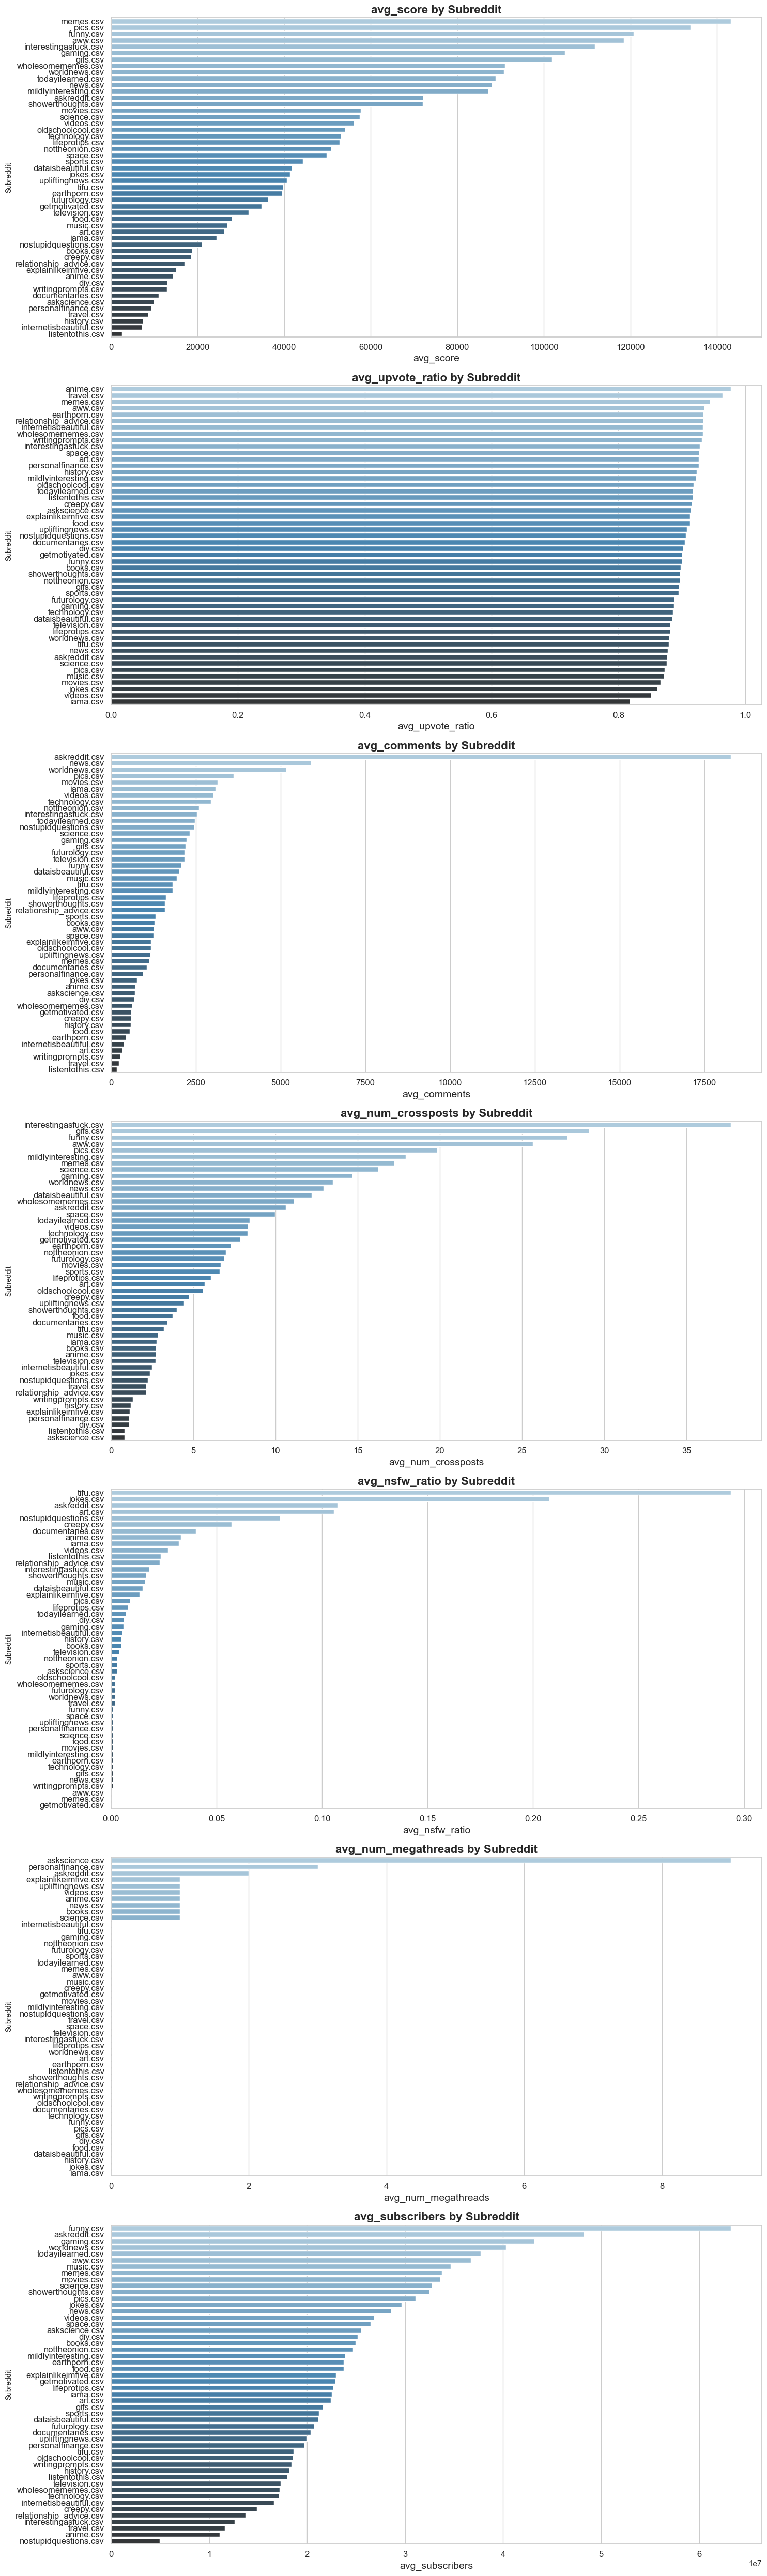

In [83]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 50))

for i, feature in enumerate(subreddit_stats.columns[1:]):
    ax = plt.subplot(7, 1, i + 1)
    sns.barplot(
        y='subreddit',
        x=feature,
        data=subreddit_stats.sort_values(feature, ascending=False),
        ax=ax,
        hue='subreddit',
        palette='Blues_d'
    )
    ax.set_title(f'{feature} by Subreddit', fontsize=16, fontweight='bold')
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Subreddit', fontsize=10)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

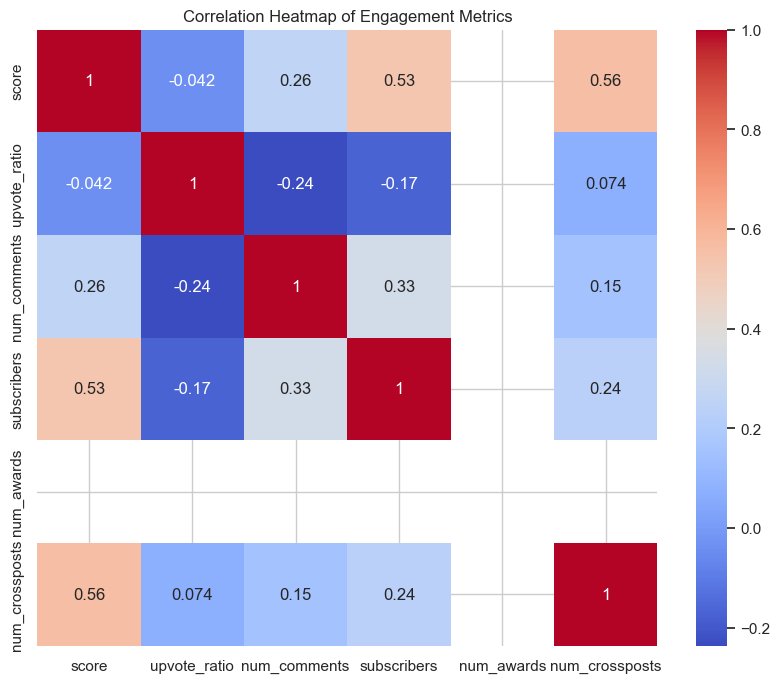

In [84]:
# Filter only numeric columns
numeric_data = all_data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()


Time Series EDA

In [85]:
# convert 'created_utc' to datetime object
all_data['created_utc'] = pd.to_datetime(all_data['created_utc'], errors='coerce', dayfirst=True)

/var/folders/wk/gprt029d6k99f1_q214qwvcw0000gn/T/ipykernel_19307/2301982806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_df['created_utc'] = pd.to_datetime(subreddit_df['created_utc'], errors='coerce')  # Ensure proper datetime conversion
/var/folders/wk/gprt029d6k99f1_q214qwvcw0000gn/T/ipykernel_19307/2301982806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_df['created_utc'] = pd.to_datetime(subreddit_df['created_utc'], errors='coerce')  # Ensure proper datetime conversion


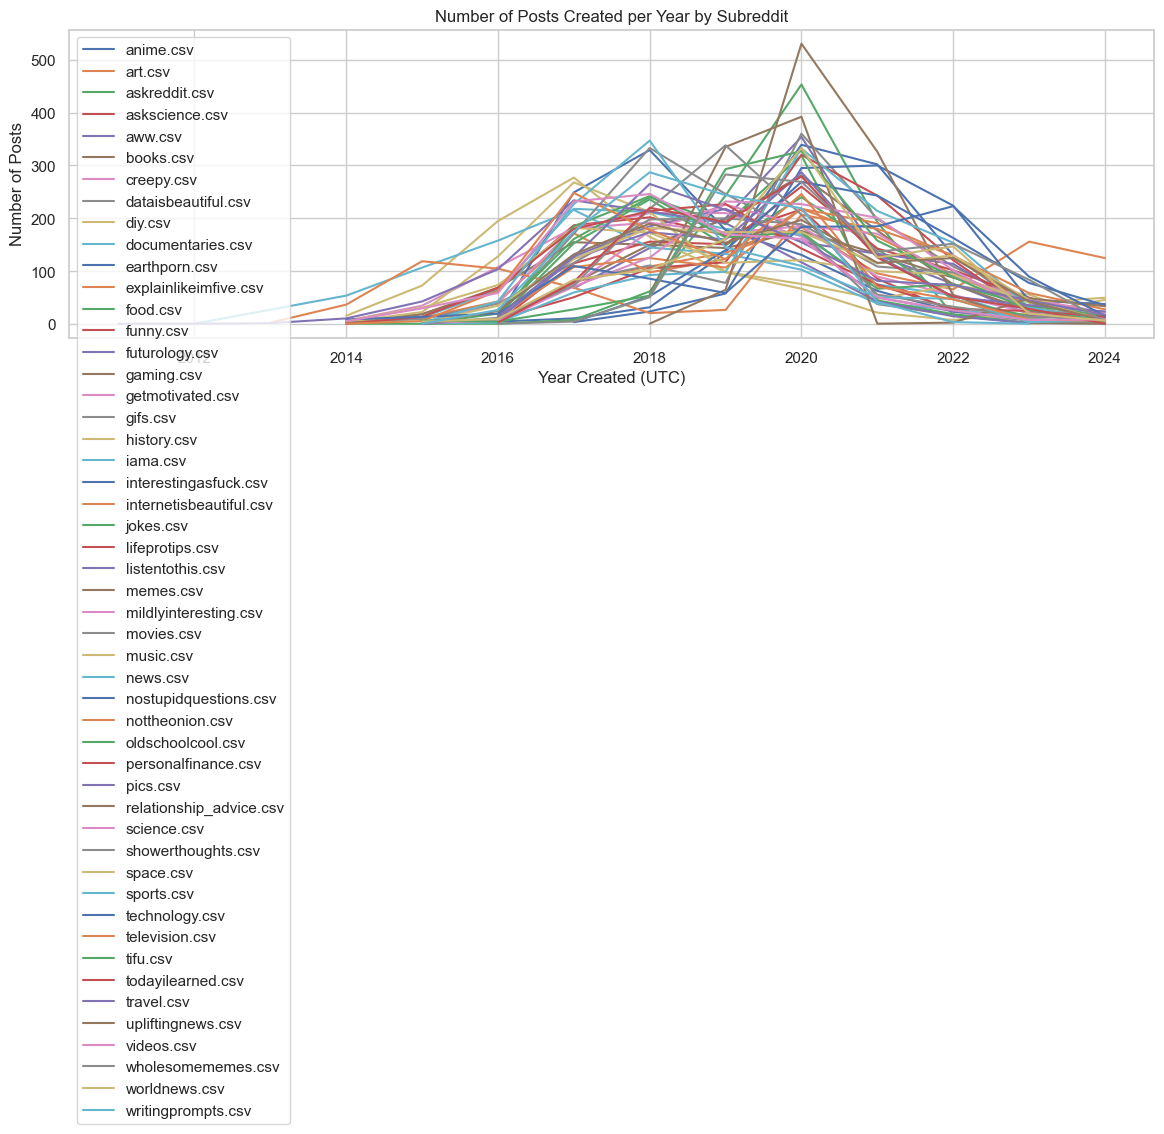

In [86]:
plt.figure(figsize=(14, 4))
for subreddit in np.unique(all_data['subreddit']):
    subreddit_df = all_data[all_data['subreddit'] == subreddit]
    subreddit_df['created_utc'] = pd.to_datetime(subreddit_df['created_utc'], errors='coerce')  # Ensure proper datetime conversion
    subreddit_grouped = subreddit_df.groupby(subreddit_df['created_utc'].dt.year).size()  # Count posts per year
    subreddit_grouped.plot(label=subreddit)

plt.ylabel('Number of Posts')
plt.xlabel('Year Created (UTC)')
plt.title('Number of Posts Created per Year by Subreddit')
plt.legend()
plt.show()


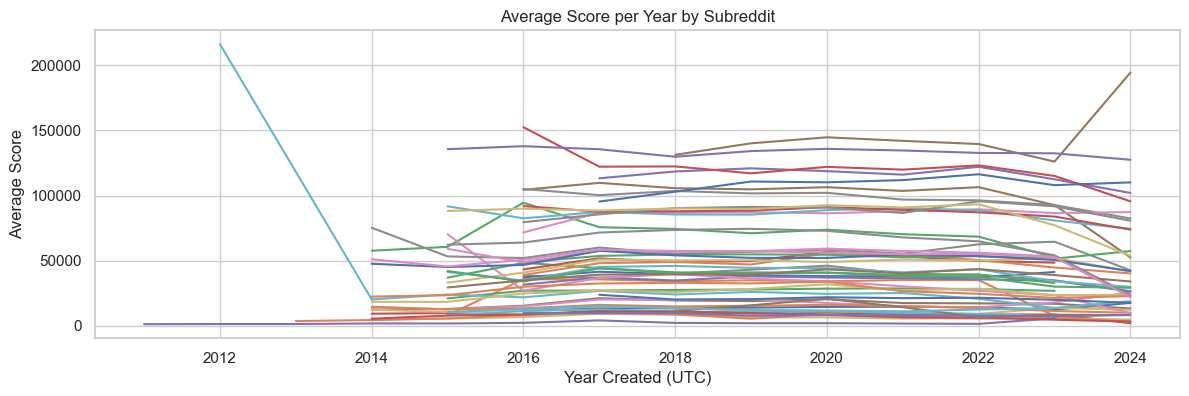

In [87]:
# Average Score per Year by Subreddit
plt.figure(figsize=[14,4])
for subreddit in np.unique(all_data['subreddit']):
  subreddit_df = all_data.where(all_data['subreddit']==subreddit)
  subreddit_grouped = subreddit_df.groupby(subreddit_df['created_utc'].dt.year)['score'].mean()
  plt.plot(subreddit_grouped.index, subreddit_grouped.values, label=subreddit)

plt.ylabel('Average Score')
plt.xlabel('Year Created (UTC)');
plt.title('Average Score per Year by Subreddit');
# plt.legend(np.unique(all_data['subreddit']))

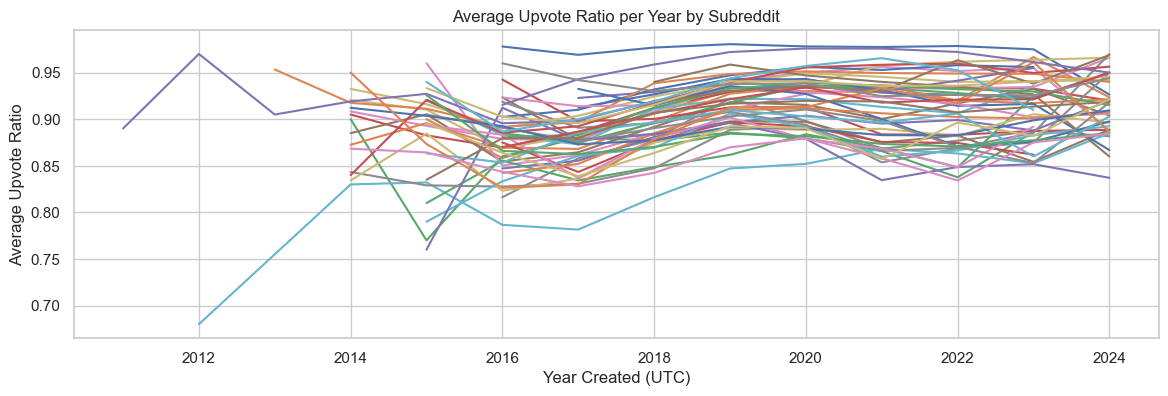

In [88]:
# Average Upvote Ratio per Year by Subreddit
plt.figure(figsize=[14,4])
for subreddit in np.unique(all_data['subreddit']):
  subreddit_df = all_data.where(all_data['subreddit']==subreddit)
  subreddit_grouped = subreddit_df.groupby(subreddit_df['created_utc'].dt.year)['upvote_ratio'].mean()
  plt.plot(subreddit_grouped.index, subreddit_grouped.values, label=subreddit)

plt.ylabel('Average Upvote Ratio')
plt.xlabel('Year Created (UTC)');
plt.title('Average Upvote Ratio per Year by Subreddit');
# plt.legend(np.unique(all_data['subreddit']))

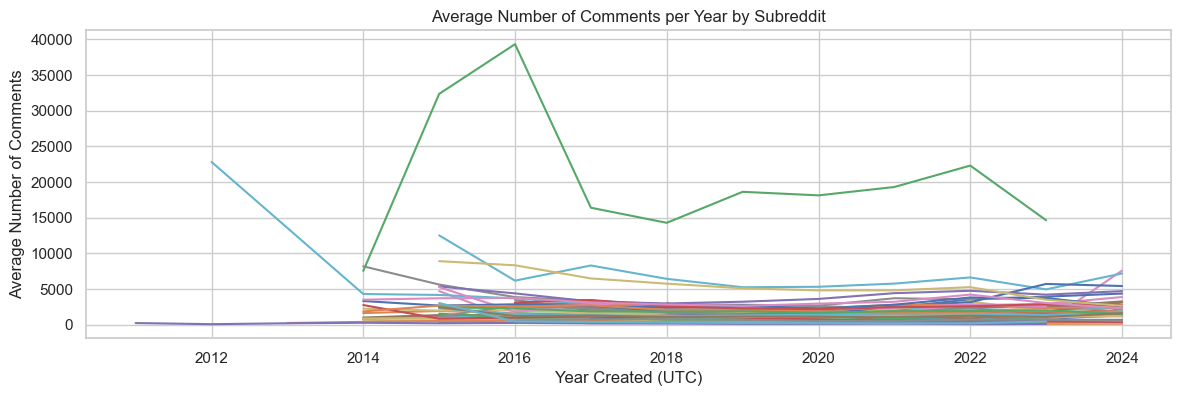

In [89]:
# Average Number of Comments per Year by Subreddit
plt.figure(figsize=[14,4])
for subreddit in np.unique(all_data['subreddit']):
  subreddit_df = all_data.where(all_data['subreddit']==subreddit)
  subreddit_grouped = subreddit_df.groupby(subreddit_df['created_utc'].dt.year)['num_comments'].mean()
  plt.plot(subreddit_grouped.index, subreddit_grouped.values, label=subreddit)

plt.ylabel('Average Number of Comments')
plt.xlabel('Year Created (UTC)');
plt.title('Average Number of Comments per Year by Subreddit');
# plt.legend(np.unique(all_data['subreddit']))

# Regression

Predict engagement metrics such as score, num_comments, and upvote_ratio.
Determine which features influence these metrics most.

In [90]:
all_data.head(10)

,title,score,upvote_ratio,num_comments,created_utc,subreddit,subscribers,num_awards,num_crossposts,post_type,is_nsfw,is_bot,is_megathread
0,Please do y...,104836,0.87,2541,2017-07-13 0...,internetisb...,16634986,0,0,link,0,0,0
1,Select a mu...,71026,0.95,1179,2020-08-09 1...,internetisb...,16634986,0,38,link,0,0,0
2,I spent the...,67305,0.95,3076,2021-02-24 2...,internetisb...,16634986,0,60,link,0,0,0
3,I made a we...,48175,0.96,1589,2021-02-12 2...,internetisb...,16634986,0,17,link,0,0,0
4,Draw a terr...,44778,0.91,3662,2016-11-17 0...,internetisb...,16634986,0,6,link,0,0,0
5,Tool that t...,44481,0.95,786,2020-06-08 2...,internetisb...,16634986,0,16,link,0,0,0
6,I made a pa...,43418,0.95,3479,2022-07-06 1...,internetisb...,16634986,0,7,link,0,0,0
7,8 minutes 4...,41732,0.90,1414,2020-06-01 0...,internetisb...,16634986,0,18,link,0,0,0
8,This websit...,41012,0.92,1679,2020-08-26 2...,internetisb...,16634986,0,17,link,0,0,0
9,Listen to l...,39670,0.93,1958,2016-12-13 0...,internetisb...,16634986,0,9,link,0,0,0


In [91]:
# Create a copy of the original data for modifications
reg_data = all_data.copy()

# Calculate initial engagement based on score and number of comments
reg_data['engagement'] = reg_data['score'] + reg_data['num_comments']

# Incorporate upvote ratio as a factor in engagement
# Multiply engagement by the upvote ratio to scale it proportionally
# Assumes the 'upvote_ratio' column exists with values between 0 and 1
reg_data['engagement'] *= reg_data['upvote_ratio']

# Reduce engagement by 50% for posts marked as "safe for work" (SFW)
# Assumes 'is_nsfw' is a boolean column where True indicates NSFW posts
reg_data.loc[reg_data['is_nsfw'] == True, 'engagement'] *= 0.5

# Filter out rows where posts were created by bots
# Assumes a boolean column 'is_bot' exists
reg_data = reg_data[reg_data['is_bot'] == False]

# Convert the 'created_utc' column to datetime format
# Coerce any invalid values to NaT (Not a Time)
reg_data['created_utc'] = pd.to_datetime(reg_data['created_utc'], errors='coerce')

# Extract the year from the datetime column for time-based analysis
reg_data['year'] = reg_data['created_utc'].dt.year

# Drop the original 'created_utc' column as it's no longer needed
reg_data.drop(['created_utc'], axis=1, inplace=True)

# Drop 'num_awards' column as it is not required for the analysis
reg_data.drop(['num_awards'], axis=1, inplace=True)

# Define the base year (earliest year in the dataset) for engagement scaling
base_year = reg_data['year'].min()

# Define a fixed scaling factor for engagement based on year difference
scale_per_year = 10  # Boost engagement by 10 units per year from the base year

# Adjust engagement values based on how old the post is relative to the base year
reg_data['engagement'] += (reg_data['year'] - base_year) * scale_per_year

# Reduce engagement by 30% for posts that redirect users to another site ('link')
# Assumes the 'post_type' column contains values like 'video', 'image', 'link', 'text'
reg_data.loc[reg_data['post_type'] == 'link', 'engagement'] *= 0.7

# Normalize the engagement column for consistency in further analysis or modeling
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Add a new column with scaled engagement values
reg_data['engagement_scaled'] = scaler.fit_transform(reg_data[['engagement']])

# Drop all columns that were used for engagement calculation
columns_to_drop = ['score', 'num_comments', 'upvote_ratio', 'post_type', 'is_bot','is_nsfw','is_megathread','subscribers','subreddit','num_crossposts','year']
reg_data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Preview the updated DataFrame to ensure changes were applied correctly
reg_data.head()


,title,engagement,engagement_scaled
0,Please do y...,65434.593,0.143531
1,Select a mu...,48079.325,0.105206
2,I spent the...,46873.365,0.102543
3,I made a we...,33511.408,0.073037
4,Draw a terr...,30891.280,0.067251


In [92]:
from gensim.models import Word2Vec
import numpy as np


# Each title will be split into a list of words
tokenized_titles = reg_data['title'].str.lower().str.split()


# # Seting parameters for Word2Vec
w2v_model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, min_count=2, workers=4, sg=1)  # sg=1 uses Skip-gram
w2v_model.train(tokenized_titles, total_examples=len(tokenized_titles), epochs=10)

# embeddings for each title
def get_average_word2vec(tokens, model, vector_size):
    """Generate average Word2Vec embedding for a list of tokens."""
    valid_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(vector_size)  # Return a zero vector if no valid words are found

vector_size = 100  # Same as the vector_size in Word2Vec
X = np.array([get_average_word2vec(tokens, w2v_model, vector_size) for tokens in tokenized_titles])

# Step 4: Define the target variable
Y = reg_data['engagement_scaled'].values

# Save the trained Word2Vec model
w2v_model.save("word2vec_model.model")
print("Word2Vec model saved successfully!")

Word2Vec model saved successfully!


In [93]:
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#  GRU Model
class GRURegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, bidirectional=False):
        super(GRURegressionModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional

       
        self.gru = nn.GRU(
            input_dim,
            hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Fully connected layer for regression output
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(
            self.num_layers * (2 if self.bidirectional else 1),
            batch_size,
            self.hidden_dim
        ).to(x.device)
        out, _ = self.gru(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Save checkpoint function
def save_checkpoint(state, filename="best_checkpoint.pth"):
    torch.save(state, filename)


def load_checkpoint(filename, model, optimizer):
    try:
        if os.path.isfile(filename):
            checkpoint = torch.load(filename, map_location=torch.device('cpu'))
            
         
            #required_keys = ['model_state_dict', 'optimizer_state_dict', 'accuracy', 'epoch']
            #missing_keys = [key for key in required_keys if key not in checkpoint]
            
            # if missing_keys:
            #     print(f"Warning: Checkpoint missing keys: {missing_keys}")
            #     return 0, 0.0
            
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            best_accuracy = checkpoint['accuracy']
            start_epoch = checkpoint['epoch']
            
            print(f"Checkpoint loaded: Resuming from epoch {start_epoch} with best accuracy: {best_accuracy:.2f}%")
            return start_epoch, best_accuracy
        else:
            print(f"No checkpoint found at {filename}")
            return 0, 0.0
    except Exception as e:
        print(f"Error loading checkpoint: {e}")
        return 0, 0.0


# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Split data into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * X.shape[0])
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
Y_train, Y_test = Y_tensor[:train_size], Y_tensor[train_size:]

# Initializing the  model and optimizer
input_dim = X.shape[1]
hidden_dim = 128
output_dim = 1
num_layers = 2
bidirectional = True
model = GRURegressionModel(input_dim, hidden_dim, output_dim, num_layers, bidirectional).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Loading checkpoint and skip the training loop
start_epoch, best_accuracy = load_checkpoint("gru_model_weights.pth", model, optimizer)

# Evaluating  the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_true = Y_test.cpu().numpy().flatten()
    test_pred = test_predictions.cpu().numpy().flatten()

# Calculate evaluation metrics
mse = mean_squared_error(test_true, test_pred)
r2 = r2_score(test_true, test_pred)

print(f"\nTest Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Using device: cpu
Error loading checkpoint: 'model_state_dict'

Test Set Evaluation:
Mean Squared Error (MSE): 0.0094
R^2 Score: -1.8044


/var/folders/wk/gprt029d6k99f1_q214qwvcw0000gn/T/ipykernel_19307/477281360.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_locatio

In [94]:
import torch
import numpy as np
from gensim.models import Word2Vec
import pandas as pd


def get_average_word2vec(tokens, model, vector_size):
    """Generate average Word2Vec embedding for a list of tokens."""
    valid_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(vector_size)


def prepare_inference_data(titles, w2v_model, vector_size=100):
    """Prepare input data for inference."""
   
    titles = titles.fillna("").astype(str)
    
    # Tokenize and preprocess titles
    tokenized_titles = [title.lower().split() for title in titles]
    
    #  embeddings
    X = np.array([get_average_word2vec(tokens, w2v_model, vector_size) for tokens in tokenized_titles])
    

    X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    return X_tensor


def load_model(model_class, checkpoint_path, input_dim, hidden_dim=128, output_dim=1, num_layers=2, bidirectional=True):
    """Load trained model from checkpoint."""
    model = model_class(input_dim, hidden_dim, output_dim, num_layers, bidirectional)
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    #model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    return model


def predict_engagement(data, w2v_model_path, checkpoint_path, model_class, vector_size=100):
    """Predict engagement for given titles."""
    # Word2Vec model
    w2v_model = Word2Vec.load(w2v_model_path)
    

    input_tensor = prepare_inference_data(data["Title"], w2v_model, vector_size)
    

    input_dim = input_tensor.shape[2]
    model = load_model(model_class, checkpoint_path, input_dim)
    
    # Make predictions
    with torch.no_grad():
        predictions = model(input_tensor)
    
    # Add predictions to the dataframe
    data["Predicted Engagement"] = predictions.numpy().flatten()
    return data


# Example usage
def main():
    # Paths and parameters
    w2v_model_path = "word2vec_model.model"
    checkpoint_path = "gru_model_weights.pth"
    data_path = "inference_results.csv"  # Input file with titles and actual engagements
    vector_size = 100
    
   
    data = pd.read_csv(data_path)
    
    # Ensure the necessary columns exist
    if "Title" not in data.columns:
        raise ValueError("Input data must contain a 'Title' column.")
    if "Actual Engagement" not in data.columns:
        data["Actual Engagement"] = "N/A"  # Add placeholder if no actual engagement

    # Predict engagement
    data_with_predictions = predict_engagement(data, w2v_model_path, checkpoint_path, GRURegressionModel, vector_size)
    
    # Printing the first 10 rows with actual vs predicted engagement
    print("\nFirst 10 Results:")
    print(
        data_with_predictions[['Title', 'Actual Engagement', 'Predicted Engagement']]
        .head(10)
        .to_string(index=False)
    )


if __name__ == "__main__":
    main()




/var/folders/wk/gprt029d6k99f1_q214qwvcw0000gn/T/ipykernel_19307/3548459216.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map


First 10 Results:
                                                                                                                                                                                                                                                                            Title  Actual Engagement  Predicted Engagement
                                                                                                                                    Please do your part to help keep informed on net neutrality Heres some info to stay educated and inform the FCC and Congress on your feedback           0.143531              0.001504
                                                                                                                                                                                                Select a muscle and it provides you with exercises to workout the selected muscle           0.105206              0.004290
I spent the last 8 months during loc